# APS Python para Ciência de Dados:

**Grupo:** Arthur Wachslicht, Gabriel Prado, Luiz Felipe Souza e Pedro Osorio Magaldi Netto

### Importando as bibliotecas necessárias:

In [77]:
import pandas as pd
from siuba import *
from plotnine import *
import numpy as np

theme_set(theme_bw())

### Importando os dados:

In [ ]:
tuition_cost = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_cost.csv')
tuition_income = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_income.csv')
salary_potential = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/salary_potential.csv')
historical_tuition = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/historical_tuition.csv')
diversity_school = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/diversity_school.csv')

### Número de estudante de cada categoria:

In [6]:
(diversity_school>>
    group_by(_.category)>>
    summarize(total_number=_.enrollment.sum()) >>
    arrange(-_.total_number))

,category,total_number
10,Women,11406332
9,White,10594649
6,Total Minority,7609693
3,Hispanic,3038062
2,Black,2623032
1,Asian,1152396
8,Unknown,1079537
5,Non-Resident Foreign,916832
7,Two Or More Races,595001
0,American Indian / Alaska Native,145875


### % médio de cada category nas universidades:

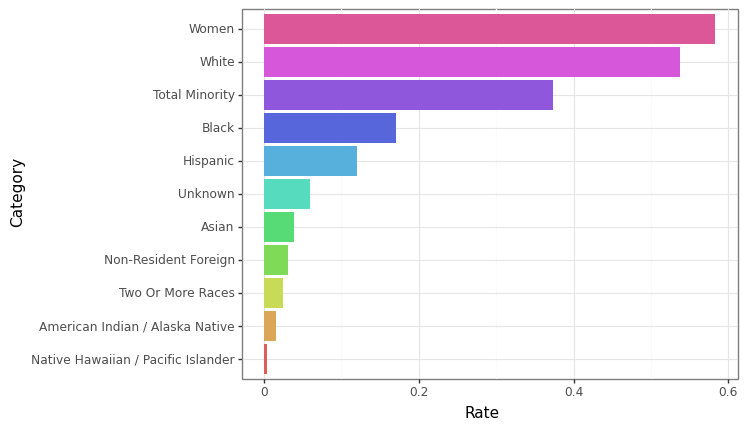

<ggplot: (117870775610)>

In [72]:
categories = (diversity_school >>
    mutate(rate=(_.enrollment/_.total_enrollment)) >>
    group_by(_.category)>>
    summarize(mean_rate=_.rate.mean()) >>
    arrange(_.mean_rate))["category"]

(diversity_school >>
    mutate(rate = (_.enrollment/_.total_enrollment),
           category = pd.Categorical(diversity_school["category"], categories = categories)) >>
    group_by(_.category) >>
    summarize(mean_rate=_.rate.mean()) >>
    ggplot(aes(x = "category", y = "mean_rate", fill = "category")) +
    geom_col(show_legend = False) +
    labs(x = "Category", y = "Rate") +
    coord_flip())

### Early Carrer Pay x Mid Carrer Pay

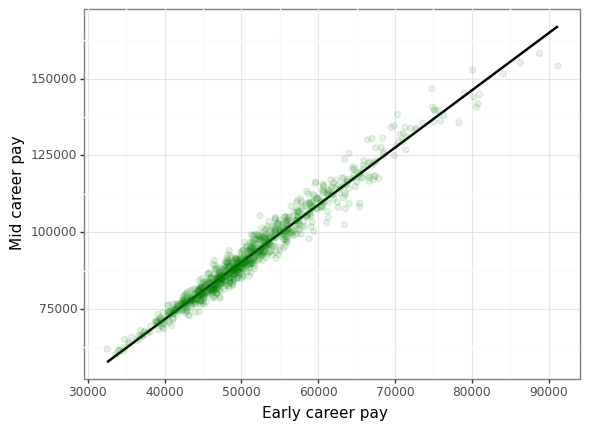

<ggplot: (117867071934)>

In [34]:
(salary_potential>>
    ggplot(aes(x="early_career_pay",y="mid_career_pay"))
    +labs(x="Early career pay",y="Mid career pay")
    +geom_smooth(color = "black", method = "lm", alpha = .5, se = False)
    +geom_point(color="green",size=2, alpha = .1))

### Instituições mais caras:

In [ ]:
(tuition_income >> 
    group_by(_.name) >> 
    summarize(mean_net_cost=_.net_cost.mean())>>
    arrange(-_.mean_net_cost)>>
    head(5)>>
    ggplot(aes(x="name",y="mean_net_cost",fill="name"))
    +labs(x="Institution",y="Mean Net Cost",main="Most Expensive Universities")
    +geom_col(alpha=1,show_legend=False) >>
    +coord_flip())

### Steam Percent x Mid Carrer Pay:

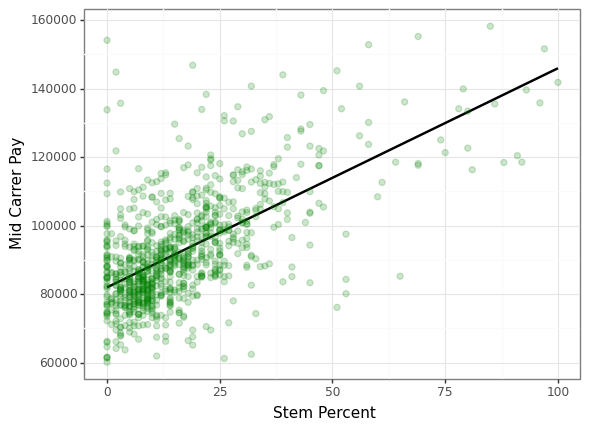

<ggplot: (117866762731)>

In [35]:
(salary_potential>>
    ggplot(aes(x="stem_percent",y="mid_career_pay"))
    +geom_smooth(color = "black", method = "lm", alpha = .5, se = False)
    +geom_point(color="green",size=2, alpha = .2)
    +labs(x="Stem Percent",y="Mid Carrer Pay"))

### Make World Better Percent x Mid Carrer Pay:

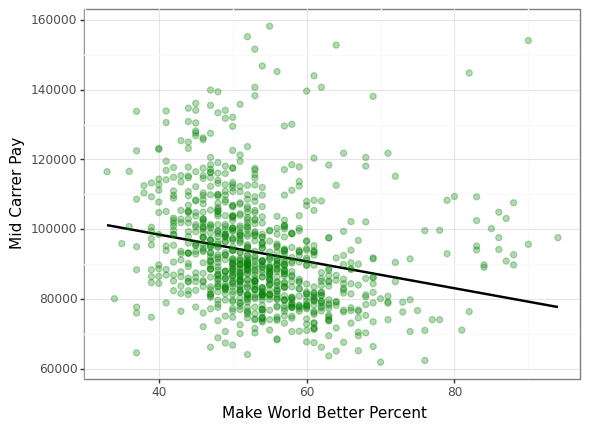

<ggplot: (117865841128)>

In [36]:
(salary_potential.dropna()>>
    ggplot(aes(x="make_world_better_percent",y="mid_career_pay"))+
    geom_smooth(color = "black", method = "lm", alpha = .5, se = False)+
    geom_point(color="green",size=2, alpha = .3)
    +labs(x="Make World Better Percent",y="Mid Carrer Pay"))

### Custo médio de tuition por nível de renda:

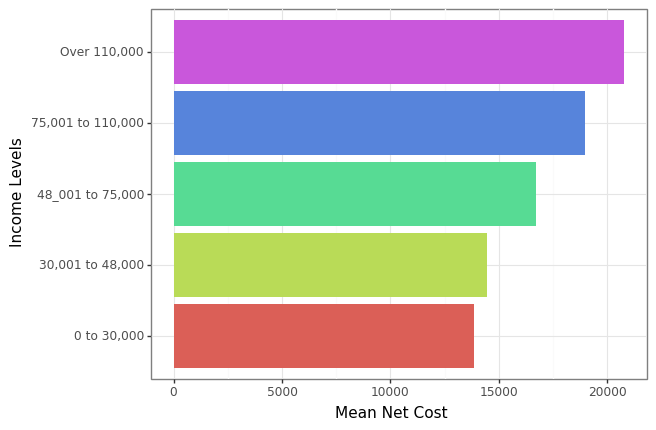

<ggplot: (117865754272)>

In [39]:
((tuition_income>>
      group_by(_.income_lvl)>>
      summarize(mean_net_cost=_.net_cost.mean())>>
      arrange(-_.mean_net_cost))>>
      ggplot(aes(x="income_lvl",y="mean_net_cost",fill="income_lvl"))+
      labs(x="Income Levels",y="Mean Net Cost",main="Mean Net Cost per Income Level")+
      geom_col(alpha=1, show_legend = False)+
      coord_flip())

### Médias salariais por estado:

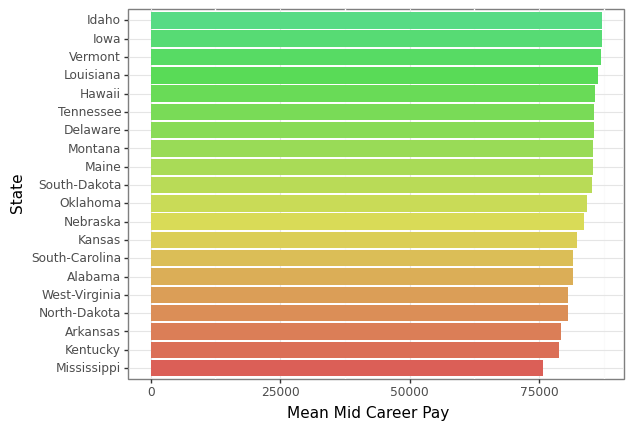

<ggplot: (117866259429)>

In [70]:
categories = (salary_potential >>
    group_by(_.state_name) >>
    summarize(mean_mid_career_pay=_.mid_career_pay.mean()) >>
    arrange(_.mean_mid_career_pay))["state_name"]

(salary_potential >>
    mutate(state_name = pd.Categorical(salary_potential["state_name"], categories = categories)) >>
    group_by(_.state_name) >>
    summarize(mean_mid_career_pay=_.mid_career_pay.mean()) >>
    head(20) >>
    ggplot(aes(x = "state_name", y = "mean_mid_career_pay", fill = "state_name")) +
    geom_col(alpha=1, show_legend = False) +
    labs(x = "State", y = "Mean Mid Career Pay") +
    coord_flip())

### Média de stem percent por estado:

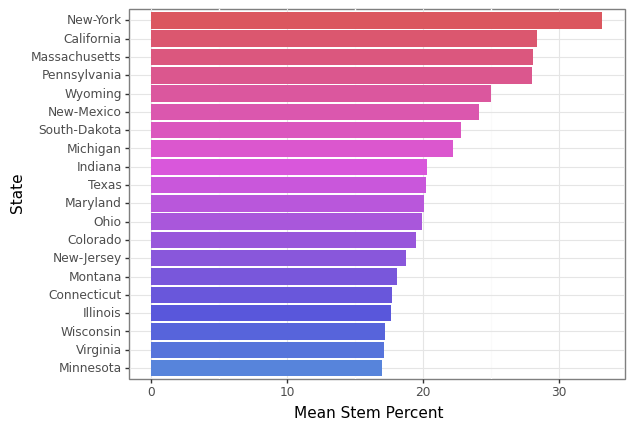

<ggplot: (117866043787)>

In [62]:
categories = (salary_potential >>
                group_by(_.state_name)>>
                summarize(mean_stem_percent=_.stem_percent.mean())>>
                arrange(_.mean_stem_percent))["state_name"]

(salary_potential >>
    mutate(state_name = pd.Categorical(salary_potential["state_name"], categories = categories)) >>
    group_by(_.state_name) >>
    summarize(mean_stem_percent=_.stem_percent.mean()) >>
    arrange(-_.mean_stem_percent) >>
    head(20) >>
    ggplot(aes(x = "state_name", y = "mean_stem_percent", fill = "state_name")) +
    geom_col(show_legend = False) +
    labs(x = "State", y = "Mean Stem Percent") +
    coord_flip())

### Custo de room and board por estado:

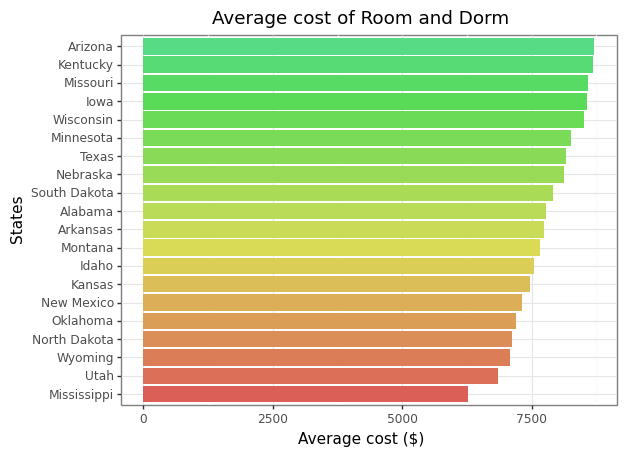

<ggplot: (117866357363)>

In [64]:
theme_set(theme_bw())

order_states = (tuition_cost >>
                group_by(_.state) >>
                summarize(avg_room_board = _.room_and_board.mean()) >>
                arrange(_.avg_room_board))["state"]

(tuition_cost >>
    mutate(state = pd.Categorical(tuition_cost["state"], categories=order_states)) >>
    group_by(_.state) >>
    summarize(avg_room_board = _.room_and_board.mean()) >>
    head(20) >>
    ggplot(aes("state", "avg_room_board")) +
    geom_col(aes(fill = "state"), show_legend = False) +
    coord_flip() +
    labs(x = "States",
         y = "Average cost ($)",
         title = "Average cost of Room and Dorm"))

# Criando variáveis potencialmente úteis para a modelagem

In [87]:
tuition_cost_perstate = (tuition_cost >>
     group_by(_.state) >>
     summarize(state_code = _.state_code.head(1), 
               avg_in_state = _.in_state_total.mean(skipna = True),
               avg_out_state = _.out_of_state_total.mean(skipna = True),
               avg_room_board = _.room_and_board.mean(skipna = True)) >>
     transmute(_.state,
               _.state_code,
               avg_tuition_cost = _.avg_room_board + (_.avg_in_state + _.avg_out_state).mean(skipna = True)))

In [89]:
salary_potential

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,1,Auburn University,Alabama,54400,104500,51.0,31
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45
2,3,The University of Alabama,Alabama,52300,97400,50.0,15
3,4,Tuskegee University,Alabama,54500,93500,61.0,30
4,5,Samford University,Alabama,48400,90500,52.0,3
...,...,...,...,...,...,...,...
930,22,Viterbo University,Wisconsin,46800,81900,62.0,3
931,23,Concordia University-Wisconsin,Wisconsin,46700,81600,61.0,9
932,24,University of Wisconsin-Parkside,Wisconsin,46000,81400,47.0,17
933,25,University of Wisconsin-River Falls,Wisconsin,47100,81300,52.0,14
